In [7]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
df1 = pd.read_csv('training.1600000.processed.noemoticon.csv', delimiter=',', encoding='ISO-8859-1')
#df1 = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', delimiter=',', encoding='ISO-8859-1')

In [9]:
# Get the first 100 rows
first_100 = df1.head(100)

# Get the last 100 rows
last_100 = df1.tail(100)

# Concatenate both DataFrames
df_first_last_200 = pd.concat([first_100, last_100], ignore_index=True)

# Display the concatenated DataFrame
print(df_first_last_200)

     0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_  \
0    0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
1    0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
2    0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
3    0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
4    0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY         joy_wolf   
..  ..         ...                           ...       ...              ...   
195  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
196  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
197  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
198  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
199  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

    @switchfoot http://twitpic.com/2y1zl - Awww, th

In [10]:
#Change colume name and value of semtiment
#Value 0 of sentiment is negative
#Value 4(default) of sentiment is positive, change from value of 4 to 1
df_first_last_200.columns = ["sentiment", "id", "date", "query", "user", "text"]
df_first_last_200.replace({'sentiment': {4:1}}, inplace=True)
df1.columns = ["sentiment", "id", "date", "query", "user", "text"]
df1.replace({'sentiment': {4:1}}, inplace=True)

In [11]:
df1

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
df_first_last_200

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
195,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
196,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
197,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
198,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [13]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '',text) #remove @mention
    text=re.sub(r'#', '', text) #remove the # symbol
    text=re.sub(r'http\S+|www\.\S+', '', text) #remove urls
    text=re.sub(r'\s+', ' ', text).strip() #remove exceesive whitespace
    text=re.sub(r'[^A-Za-z0-9\s]', '', text) #character + number

    return text
    
df1["cleaned_text"] = df1["text"].apply(cleanTxt)
df_first_last_200["cleaned_text"] = df_first_last_200["text"].apply(cleanTxt)

In [14]:
df1

,sentiment,id,date,query,user,text,cleaned_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...


In [15]:
#Create dataframe ,preparing for training a model
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df2["cleaned_text"] = df1["cleaned_text"]
df3["sentiment"]=df1["sentiment"]

df_t_2 = pd.DataFrame()
df_t_3 = pd.DataFrame()
df_t_2["cleaned_text"] = df_first_last_200["cleaned_text"]
df_t_3["sentiment"] = df_first_last_200["sentiment"]

In [16]:
df2

,cleaned_text
0,is upset that he cant update his Facebook by t...
1,I dived many times for the ball Managed to sav...
2,my whole body feels itchy and like its on fire
3,no its not behaving at all im mad why am i her...
4,not the whole crew
...,...
1599994,Just woke up Having no school is the best feel...
1599995,TheWDBcom Very cool to hear old Walt interviews
1599996,Are you ready for your MoJo Makeover Ask me fo...
1599997,Happy 38th Birthday to my boo of alll time Tup...


In [17]:
df3

,sentiment
0,0
1,0
2,0
3,0
4,0
...,...
1599994,1
1599995,1
1599996,1
1599997,1


In [18]:
#Inserting value each value in x and y
X = df2["cleaned_text"]    # Features
y = df3["sentiment"]   # sentiment score

X_t = df_t_2["cleaned_text"]
y_t = df_t_3["sentiment"]

In [19]:
#All data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=100000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [21]:
#Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [22]:
#Predict and evaluate
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.798865625
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [23]:
#200 data
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

test_tfidf_vectorizer = TfidfVectorizer(max_features=1000)
test_X_train_tfidf = test_tfidf_vectorizer.fit_transform(X_t_train)
test_X_t_test_tfidf = test_tfidf_vectorizer.transform(X_t_test)

test_model = LogisticRegression(max_iter=1000)
test_model.fit(test_X_train_tfidf, y_t_train)

y_t_pred = test_model.predict(test_X_t_test_tfidf)
t_accuracy = accuracy_score(y_t_test, y_t_pred)
print("Accuracy:", t_accuracy)
print("Classification Report:\n", classification_report(y_t_test, y_t_pred))

Accuracy: 0.575
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60        21
           1       0.56      0.53      0.54        19

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.57      0.57      0.57        40



In [24]:
#New data (example)
new_sentences = [
    "You are so annoying",
    "god bless you",
    "interesting!"
]

In [25]:
#vectorize new sentences to make predictions
new_sentences_tfidf = tfidf_vectorizer.transform(new_sentences)

In [26]:
print(new_sentences_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (3, 100000)>
  Coords	Values
  (0, 7016)	0.7814036457842287
  (0, 7863)	0.4163061676219582
  (0, 80949)	0.35139923542518947
  (0, 99273)	0.3043289248455129
  (1, 13277)	0.7572963763326259
  (1, 35866)	0.5893011803327997
  (1, 99273)	0.2814716988470475
  (2, 43470)	1.0


In [27]:
#make predictions of the sentences
new_predictions = model.predict(new_sentences_tfidf)

In [28]:
#display prediction results
for sentence, prediction in zip(new_sentences, new_predictions):
    print(f"Sentence: {sentence}")
    print(f"Predicted label: {prediction}")
    print("------")

Sentence: You are so annoying
Predicted label: 0
------
Sentence: god bless you
Predicted label: 1
------
Sentence: interesting!
Predicted label: 1
------


In [29]:
#download another seperate file to test
dft = pd.read_csv('sentiment-test.csv', delimiter=',', encoding='ISO-8859-1')
dft


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#edit testing file(changed sentiment tag form negavtive positive to 1 and 0)
dft.replace({'sentiment': {'positive' : 1}}, inplace=True)
dft.replace({'sentiment': {'negative' : 0}}, inplace=True)
dft = dft.drop(dft[dft['sentiment'] == 'neutral'].index)
dft.dropna(subset=['textID'], inplace=True)

#cleans dft text and adds new columm
dft["cleaned_text"] = dft["text"].apply(cleanTxt)

dft

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting precisely sk...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044.0,2381740.0,18.0,Recession hit Veronique Branquinho she has to ...
3,01082688c6,happy bday!,1,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,60-70,Angola,32866272.0,1246700.0,26.0,I like it
5,726e501993,that`s great!! weee!! visitors!,1,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0,thats great weee visitors
...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554.0,120340.0,55.0,its at 3 am im very tired but i cant sleep but...
3530,416863ce47,All alone in this old house again. Thanks for...,1,night,31-45,Niger,24206644.0,1266700.0,19.0,All alone in this old house again Thanks for t...
3531,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589.0,910770.0,226.0,I know what you mean My little dog is sinking ...
3532,df1baec676,_sutra what is your next youtube video gonna b...,1,noon,60-70,North Korea,25778816.0,120410.0,214.0,sutra what is your next youtube video gonna be...


In [31]:
#format dataset into appropriate format
x_axis = dft['cleaned_text']
X_test2_tfidf = tfidf_vectorizer.transform(x_axis)
y_axis = dft['sentiment']
y_axis = y_axis.astype(int)

In [32]:
y_test2_pred = model.predict(X_test2_tfidf)
accuracy2 = accuracy_score(y_axis, y_test2_pred)
print("Accuracy:", accuracy2)
print("Classification Report:\n", classification_report(y_axis, y_test2_pred))

Accuracy: 0.8702471482889734
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1001
           1       0.89      0.86      0.87      1103

    accuracy                           0.87      2104
   macro avg       0.87      0.87      0.87      2104
weighted avg       0.87      0.87      0.87      2104



In [33]:
#most common word analysis on 1.6 million tweets dataset
words_dict = dict()
for t in df2['cleaned_text']:
    words = [e.lower() for e in t.split()]
    for w in words:
        if w in words_dict:
            words_dict[w] += 1
        else:
            words_dict[w] = 0

occurence_rate = sorted(words_dict.items(), key = lambda x: -x[1])
print(occurence_rate[:100])

for i in range(100):
    print('most occuring word no.' + str(i + 1) + ': ' + str(occurence_rate[i]))


[('i', 751043), ('to', 564554), ('the', 520032), ('a', 378247), ('my', 314071), ('and', 298407), ('you', 270129), ('is', 236036), ('it', 230910), ('for', 215701), ('in', 214236), ('of', 183432), ('im', 178364), ('on', 167092), ('me', 160209), ('so', 150783), ('have', 144512), ('that', 141348), ('but', 127474), ('just', 125058), ('with', 114877), ('be', 112544), ('at', 111318), ('its', 108552), ('not', 106376), ('was', 104081), ('this', 93006), ('now', 90386), ('good', 89409), ('up', 88480), ('day', 82400), ('get', 81489), ('all', 80697), ('out', 80533), ('like', 77749), ('are', 77697), ('no', 73638), ('go', 72926), ('dont', 67298), ('do', 65989), ('your', 65000), ('today', 64618), ('too', 64213), ('going', 64089), ('love', 63579), ('cant', 62879), ('work', 62779), ('got', 60752), ('time', 56112), ('from', 55999), ('back', 55983), ('lol', 55189), ('u', 52879), ('one', 52307), ('what', 52220), ('will', 51838), ('know', 51204), ('we', 50916), ('about', 50206), ('really', 49554), ('am', 49

In [34]:
#add a time column to dataset by extracting hourly time interval data
def get_time(date):
    time = date.split()[3]
    hour = time.split(':')[0]
    return hour

df1['time'] = df1['date'].apply(get_time)

df1

,sentiment,id,date,query,user,text,cleaned_text,time
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,22
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,22
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,22
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,22
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,22
...,...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...,08
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews,08
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,08
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...,08


In [35]:
#adds a new month column for each rows
def get_month(date):
    month = date.split()[1]
    return month

df1['month'] = df1['date'].apply(get_month)
df1

,sentiment,id,date,query,user,text,cleaned_text,time,month
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...,22,Apr
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball Managed to sav...,22,Apr
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,22,Apr
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...,22,Apr
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew,22,Apr
...,...,...,...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Just woke up Having no school is the best feel...,08,Jun
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,TheWDBcom Very cool to hear old Walt interviews,08,Jun
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Are you ready for your MoJo Makeover Ask me fo...,08,Jun
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Happy 38th Birthday to my boo of alll time Tup...,08,Jun


In [40]:
#use matplotlib for data visualization
#
import numpy as np
import matplotlib.pyplot as plt
#create a function to plot a data against 24 hour time_frame
def plot_2time(rate):

    time = list(rate.keys())
    rate = list(rate.values())
    #assign x and y points of the graph
    x_points = np.array(time)
    y_points = np.array(rate)

    #plot graph
    plt.plot(x_points, y_points)
    plt.show()

    #this function has no return variables

In [37]:
#finding most popular tweet times
time_dict = dict()
for t in df1['time']:
    if t in time_dict:
        time_dict[t] += 1
    else:
        time_dict[t] = 0

time_occurence_rate = dict(sorted(time_dict.items(), key = lambda x: x[0]))
print(time_occurence_rate)

{'00': 80864, '01': 75267, '02': 73990, '03': 74252, '04': 76994, '05': 78622, '06': 80851, '07': 83653, '08': 76286, '09': 67277, '10': 60688, '11': 61008, '12': 51652, '13': 49688, '14': 50379, '15': 50642, '16': 55719, '17': 51842, '18': 53484, '19': 57721, '20': 57058, '21': 68963, '22': 78326, '23': 84749}


In [45]:
time_occurence_rate

{'00': 80864,
 '01': 75267,
 '02': 73990,
 '03': 74252,
 '04': 76994,
 '05': 78622,
 '06': 80851,
 '07': 83653,
 '08': 76286,
 '09': 67277,
 '10': 60688,
 '11': 61008,
 '12': 51652,
 '13': 49688,
 '14': 50379,
 '15': 50642,
 '16': 55719,
 '17': 51842,
 '18': 53484,
 '19': 57721,
 '20': 57058,
 '21': 68963,
 '22': 78326,
 '23': 84749}

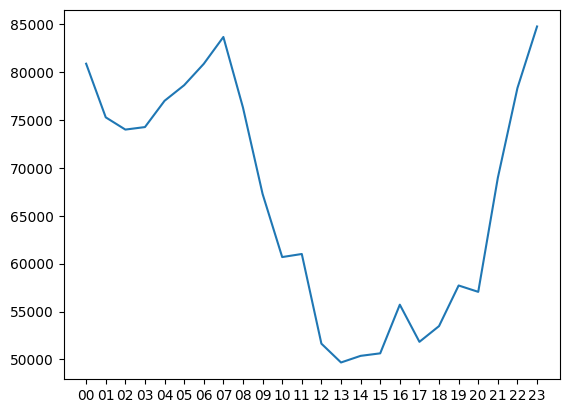

In [41]:
#plot tweet rate for each hour
plot_2time(time_occurence_rate)


In [43]:
#find sentiment ratios for each time in dataset
time_occur_sentiment = dict()

for t in time_occurence_rate:
    time_occur_sentiment[t] = [0, 0]

#let negative(sentiment = 0) counted at index = 0 and positive(sentiment = 1) count at index 1 in dict
i = 0
for index, row in df1.iterrows():
    t = row['time']
    sent = row['sentiment']
    if row['sentiment'] == 0:
        time_occur_sentiment[t][0] += 1
    elif row['sentiment'] == 1:
        time_occur_sentiment[t][1] += 1

    i += 1

In [47]:
time_occur_sentiment

{'00': [35582, 45283],
 '01': [30581, 44687],
 '02': [30171, 43820],
 '03': [31717, 42536],
 '04': [34946, 42049],
 '05': [37774, 40849],
 '06': [40076, 40776],
 '07': [42208, 41446],
 '08': [40166, 36121],
 '09': [36511, 30767],
 '10': [31597, 29092],
 '11': [31336, 29673],
 '12': [28120, 23533],
 '13': [27449, 22240],
 '14': [27077, 23303],
 '15': [28531, 22112],
 '16': [31594, 24126],
 '17': [29316, 22527],
 '18': [29422, 24063],
 '19': [31193, 26529],
 '20': [30102, 26957],
 '21': [36007, 32957],
 '22': [39017, 39310],
 '23': [39506, 45244]}

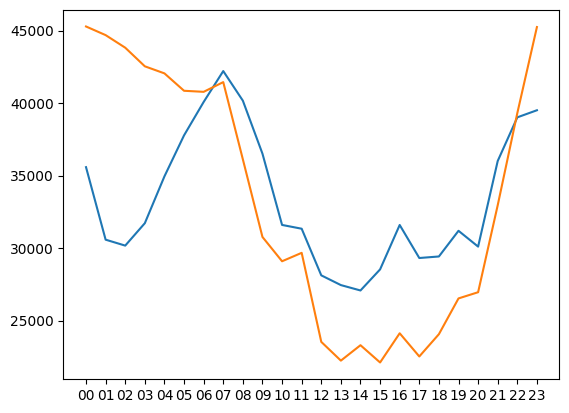

In [44]:
#when negative is blue and positive is yellow
plot_2time(time_occur_sentiment)

In [56]:
#let index 2 be ratio of negative sentiment and index 3 be ratio of positive sentiment
def get_sentiment_ratio(time_occur_sentiment):
    time_occur_ratio = dict(time_occur_sentiment)
    for t in time_occurence_rate:
        negative_n = time_occur_sentiment[t][0]
        positive_n = time_occur_sentiment[t][1]
        total_n = time_occurence_rate[t]

        negative_ratio = negative_n / total_n
        positive_ratio = positive_n / total_n

        time_occur_ratio[t] = [negative_ratio, positive_ratio]

    return time_occur_ratio

time_occur_ratio = get_sentiment_ratio(time_occur_sentiment)
print(time_occur_ratio)
    

{'00': [0.4400227542540562, 0.5599896121883656], '01': [0.4063002378200274, 0.5937130482150212], '02': [0.4077713204487093, 0.5922421948912016], '03': [0.4271534773474115, 0.5728599903032915], '04': [0.4538795230797205, 0.5461334649453204], '05': [0.4804507644170843, 0.5195619546691765], '06': [0.4956772334293948, 0.5043351350014224], '07': [0.5045605058993701, 0.49545144824453397], '08': [0.5265186272710589, 0.47349448129407756], '09': [0.5426966125124485, 0.45731825140835647], '10': [0.5206465858159768, 0.4793698919061429], '11': [0.513637555730396, 0.4863788355625492], '12': [0.5444126074498568, 0.4556067528846898], '13': [0.5524271453872163, 0.4475929801964257], '14': [0.5374660076619227, 0.4625538418785605], '15': [0.5633861221910667, 0.4366336242644445], '16': [0.5670238159335236, 0.432994131265816], '17': [0.5654874426140967, 0.4345318467651711], '18': [0.5501084436466981, 0.4499102535337671], '19': [0.5404099028083367, 0.45960742190883735], '20': [0.5275684391321112, 0.47244908

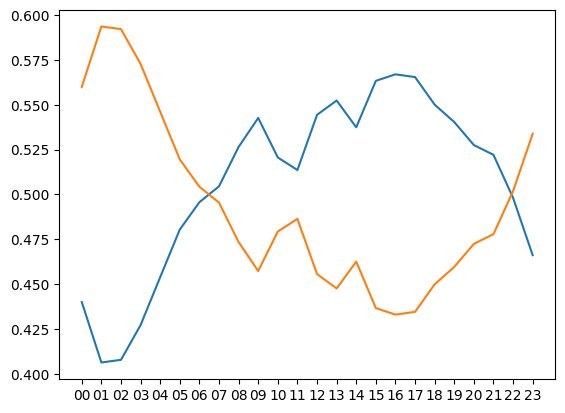

In [57]:
#when positive is yello and negative is blue
plot_2time(time_occur_ratio)